## Stuff For Report

### Research Paper we are 'replicating'
Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks

https://arxiv.org/pdf/1511.06434.pdf

This research paper introduces a class of powerful GANs called Deep Convolutional Generative Adversarial Networks (DCGANs), which use deep convolutional neural networks (CNNs) as building blocks for both the Generator and the Discriminator. The authors propose several architectural changes to improve the stability of GAN training, making it possible to train deeper models that generate higher-quality images.

The key contributions and findings of the paper are:

### Architectural guidelines for stable DCGAN training:
- Use strided convolutions instead of pooling layers in the Discriminator.
- Use fractional-strided convolutions in the Generator.
- Remove fully connected hidden layers for deeper architectures.
- Use batch normalization in both the Generator and the Discriminator.
- Use ReLU activation in the Generator except for the output layer, which uses Tanh.
- Use LeakyReLU activation in the Discriminator.

### Generator:
- Transposed convolution layer with 100 input channels, 512 output channels, 4x4 kernel size, 1 stride, and 0 padding.
- Transposed convolution layer with 512 input channels, 256 output channels, 4x4 kernel size, 2 stride, and 1 padding.
- Transposed convolution layer with 256 input channels, 128 output channels, 4x4 kernel size, 2 stride, and 1 padding.
- Transposed convolution layer with 128 input channels, 3 output channels (for RGB images), 4x4 kernel size, 2 stride, and 1 padding.

### Discriminator:
- Convolution layer with 3 input channels (for RGB images), 128 output channels, 4x4 kernel size, 2 stride, and 1 padding.
- Convolution layer with 128 input channels, 256 output channels, 4x4 kernel size, 2 stride, and 1 padding.
- Convolution layer with 256 input channels, 512 output channels, 4x4 kernel size, 2 stride, and 1 padding.
- Convolution layer with 512 input channels, 1 output channel, 4x4 kernel size, 1 stride, and 0 padding.

### Metrics:
- Loss D: This is the Discriminator Loss. It represents how well the Discriminator can distinguish between real and generated images during each iteration. Lower values indicate better performance.
- Loss G: This is the Generator Loss. It represents how well the Generator can create realistic images that can "fool" the Discriminator. Lower values indicate better performance.
- D(x): This is the average output probability of the Discriminator for real images (x). It represents how well the Discriminator can identify real images. Values closer to 1 indicate better performance.
- D(G(z)): This value has two parts: the numerator is the average output probability of the Discriminator for generated images before the Generator update. Lower values indicate that the Discriminator is better at identifying fake images. The denominator is the average output probability of the Discriminator for generated images after the Generator update. Higher values indicate that the Generator is better at creating realistic images that can fool the Discriminator.


### Datasets
EMNIST - https://www.nist.gov/itl/products-and-services/emnist-dataset

CIFAR-10 - https://www.cs.toronto.edu/~kriz/cifar.html

Celeb-A - https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

## DCGAN - EMNIST

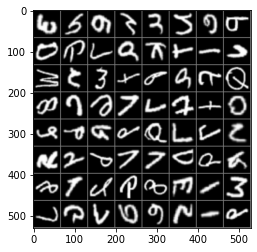

[1/10] [0/882] Loss_D: 1.4412	Loss_G: 2.7037	D(x): 0.5550	D(G(z)): 0.5590 / 0.0709
[1/10] [50/882] Loss_D: 0.0025	Loss_G: 7.4242	D(x): 0.9992	D(G(z)): 0.0018 / 0.0006
[1/10] [100/882] Loss_D: 0.0019	Loss_G: 7.9719	D(x): 0.9995	D(G(z)): 0.0015 / 0.0003
[1/10] [150/882] Loss_D: 0.0006	Loss_G: 8.1752	D(x): 0.9998	D(G(z)): 0.0004 / 0.0003
[1/10] [200/882] Loss_D: 0.0004	Loss_G: 8.6334	D(x): 0.9999	D(G(z)): 0.0002 / 0.0002
[1/10] [250/882] Loss_D: 0.0002	Loss_G: 8.8904	D(x): 1.0000	D(G(z)): 0.0002 / 0.0001
[1/10] [300/882] Loss_D: 0.0002	Loss_G: 9.1749	D(x): 1.0000	D(G(z)): 0.0001 / 0.0001
[1/10] [350/882] Loss_D: 0.0001	Loss_G: 9.2901	D(x): 1.0000	D(G(z)): 0.0001 / 0.0001
[1/10] [400/882] Loss_D: 0.0002	Loss_G: 8.9510	D(x): 1.0000	D(G(z)): 0.0002 / 0.0001
[1/10] [450/882] Loss_D: 0.0009	Loss_G: 9.4710	D(x): 0.9997	D(G(z)): 0.0006 / 0.0001
[1/10] [500/882] Loss_D: 0.0002	Loss_G: 9.7485	D(x): 0.9999	D(G(z)): 0.0001 / 0.0001
[1/10] [550/882] Loss_D: 0.0318	Loss_G: 3.5893	D(x): 0.9940	D(G(z)):

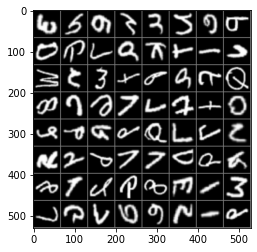

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from torchvision.datasets import EMNIST
import matplotlib.pyplot as plt
import numpy as np

# Visualize the generated images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


# Generator
class Generator(nn.Module):
    def __init__(self, nz, ngf, nc):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, nc, ndf):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x).view(-1)

# Hyperparameters
nz = 100
ngf = 64
ndf = 64
nc = 1  # EMNIST is grayscale, so it has only 1 channel
lr = 0.0002
beta1 = 0.5
batch_size = 128
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create Generator and Discriminator
netG = Generator(nz, ngf, nc).to(device)
netD = Discriminator(nc, ndf).to(device)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

dataset = EMNIST(root='./data', split='balanced', download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Visualize a batch of real images from the EMNIST dataset
dataiter = iter(dataloader)
real_images, real_labels = dataiter.next()
grid = torchvision.utils.make_grid(real_images[:64], nrow=8, padding=2)
imshow(grid)

# ...
# Training loop
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        
        # Train the Discriminator
        netD.zero_grad()
        real_labels = torch.full((batch_size,), 1, dtype=torch.float, device=device)
        real_output = netD(real_images)
        real_loss = criterion(real_output, real_labels)
        real_loss.backward()
        
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake_images = netG(noise)
        fake_labels = torch.full((batch_size,), 0, dtype=torch.float, device=device)
        fake_output = netD(fake_images.detach())
        fake_loss = criterion(fake_output, fake_labels)
        fake_loss.backward()
        
        D_loss = real_loss + fake_loss
        optimizerD.step()
        
        # Train the Generator
        netG.zero_grad()
        G_labels = torch.full((batch_size,), 1, dtype=torch.float, device=device)
        G_output = netD(fake_images)
        G_loss = criterion(G_output, G_labels)
        G_loss.backward()
        optimizerG.step()

        # Calculate D(x) and D(G(z))
        D_x = real_output.mean().item()
        D_G_z1 = fake_output.mean().item()
        D_G_z2 = G_output.mean().item()

        # Print progress
        if i % 50 == 0:
            print(f"[{epoch+1}/{epochs}] [{i}/{len(dataloader)}] Loss_D: {D_loss.item():.4f}\tLoss_G: {G_loss.item():.4f}\tD(x): {D_x:.4f}\tD(G(z)): {D_G_z1:.4f} / {D_G_z2:.4f}")

# ...

# Generate a batch of images after training
noise = torch.randn(batch_size, nz, 1, 1, device=device)
fake_images = netG(noise).detach().cpu()

# Visualize the generated images
generated_grid = torchvision.utils.make_grid(fake_images[:64], nrow=8, padding=2)
imshow(grid)
            
# Save the trained models
torch.save(netG.state_dict(), "dcgan_generator.pth")
torch.save(netD.state_dict(), "dcgan_discriminator.pth")



## DCGAN - CIFAR-10 (Airplane)

Files already downloaded and verified
Images from the CIFAR-10 dataset:


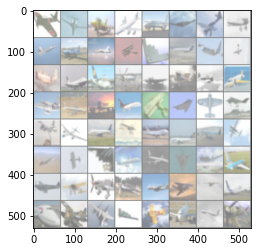

[0/10][0/79]	Loss_D: 1.3948	Loss_G: 0.7287	D(x): 0.4950	D(G(z)): 0.4956 / 0.4831
[0/10][50/79]	Loss_D: 1.0142	Loss_G: 1.0569	D(x): 0.5852	D(G(z)): 0.3631 / 0.3480
[1/10][0/79]	Loss_D: 1.1486	Loss_G: 0.9254	D(x): 0.5625	D(G(z)): 0.4248 / 0.4013
[1/10][50/79]	Loss_D: 0.9612	Loss_G: 1.1287	D(x): 0.6265	D(G(z)): 0.3869 / 0.3286
[2/10][0/79]	Loss_D: 1.0177	Loss_G: 1.1913	D(x): 0.5882	D(G(z)): 0.3477 / 0.3335
[2/10][50/79]	Loss_D: 1.1018	Loss_G: 1.3165	D(x): 0.5747	D(G(z)): 0.3236 / 0.3588
[3/10][0/79]	Loss_D: 0.8497	Loss_G: 1.1664	D(x): 0.6588	D(G(z)): 0.3409 / 0.3209
[3/10][50/79]	Loss_D: 0.6887	Loss_G: 1.3367	D(x): 0.7046	D(G(z)): 0.2799 / 0.2746
[4/10][0/79]	Loss_D: 0.8538	Loss_G: 1.3357	D(x): 0.6586	D(G(z)): 0.3209 / 0.2811
[4/10][50/79]	Loss_D: 0.6172	Loss_G: 1.4860	D(x): 0.7152	D(G(z)): 0.2364 / 0.2530
[5/10][0/79]	Loss_D: 0.5102	Loss_G: 1.5910	D(x): 0.7774	D(G(z)): 0.2223 / 0.2088
[5/10][50/79]	Loss_D: 0.4552	Loss_G: 1.8231	D(x): 0.7636	D(G(z)): 0.1608 / 0.1669
[6/10][0/79]	Loss_D: 0

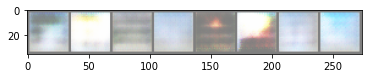

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

# Visualize the generated images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
class AirplaneDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.airplane_indices = [i for i, (_, label) in enumerate(self.dataset) if label == 0]

    def __getitem__(self, index):
        image, label = self.dataset[self.airplane_indices[index]]
        return image, label

    def __len__(self):
        return len(self.airplane_indices)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Conv2d(512, 1, 1, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1).squeeze(1)

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
airplane_dataset = AirplaneDataset(cifar_dataset)
dataloader = DataLoader(airplane_dataset, batch_size=64, shuffle=True, num_workers=2)

# Get a batch of images from the dataset
dataiter = iter(dataloader)
images, labels = dataiter.next()

# Create a grid of images and display it
grid = utils.make_grid(images, nrow=8, padding=2, normalize=True)
print("Images from the CIFAR-10 dataset:")
imshow(grid)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create Generator and Discriminator
netG = Generator().to(device)
netD = Discriminator().to(device)
   
# Number of epochs
num_epochs = 10

# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize the progression of the generator
fixed_noise = torch.randn(64, 100, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))
    
# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        # Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        # Train with all-real batch
        netD.zero_grad()
        real_data = data[0].to(device)
        batch_size = real_data.size(0)
        label = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_data)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # Train with all-fake batch
        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_data = netG(noise)
        label.fill_(fake_label)
        output = netD(fake_data.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update G network: maximize log(D(G(z)))
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake_data)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

# Save the trained Generator and Discriminator
torch.save(netG.state_dict(), 'generator_cifar10.pth')
torch.save(netD.state_dict(), 'discriminator_cifar10.pth')

# Generate a batch of images after training
noise = torch.randn(batch_size, 100, 1, 1, device=device)
fake_images = netG(noise).detach()

# Move the images back to the CPU and convert them to a grid
fake_images = fake_images.cpu()
grid = utils.make_grid(fake_images, nrow=8, padding=2, normalize=True)

# Show the grid of images
imshow(grid)

Files already downloaded and verified
Images from the CIFAR-10 dataset:


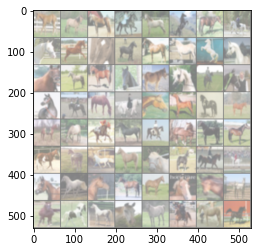

[0/10][0/79]	Loss_D: 1.4064	Loss_G: 0.6391	D(x): 0.5509	D(G(z)): 0.5531 / 0.5284
[0/10][50/79]	Loss_D: 0.9898	Loss_G: 1.0562	D(x): 0.6132	D(G(z)): 0.3780 / 0.3490
[1/10][0/79]	Loss_D: 1.1343	Loss_G: 1.0638	D(x): 0.5308	D(G(z)): 0.3776 / 0.3506
[1/10][50/79]	Loss_D: 0.9337	Loss_G: 1.1060	D(x): 0.6452	D(G(z)): 0.3757 / 0.3383
[2/10][0/79]	Loss_D: 1.1186	Loss_G: 1.2260	D(x): 0.5617	D(G(z)): 0.3406 / 0.3261
[2/10][50/79]	Loss_D: 0.6790	Loss_G: 1.4441	D(x): 0.7279	D(G(z)): 0.2839 / 0.2751
[3/10][0/79]	Loss_D: 0.9966	Loss_G: 1.4984	D(x): 0.7027	D(G(z)): 0.3593 / 0.2845
[3/10][50/79]	Loss_D: 0.7161	Loss_G: 1.7135	D(x): 0.7060	D(G(z)): 0.2517 / 0.2310
[4/10][0/79]	Loss_D: 0.6420	Loss_G: 1.5547	D(x): 0.7334	D(G(z)): 0.2389 / 0.2665
[4/10][50/79]	Loss_D: 0.4434	Loss_G: 1.9503	D(x): 0.8619	D(G(z)): 0.2469 / 0.1472
[5/10][0/79]	Loss_D: 0.4773	Loss_G: 1.8853	D(x): 0.7618	D(G(z)): 0.1583 / 0.1681
[5/10][50/79]	Loss_D: 0.3195	Loss_G: 2.3159	D(x): 0.8604	D(G(z)): 0.1054 / 0.1394
[6/10][0/79]	Loss_D: 0

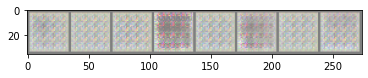

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

# Visualize the generated images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
class HorseDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.horse_indices = [i for i, (_, label) in enumerate(self.dataset) if label == 7]

    def __getitem__(self, index):
        return self.dataset[self.horse_indices[index]]

    def __len__(self):
        return len(self.horse_indices)
    
# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Conv2d(512, 1, 1, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1).squeeze(1)

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_horse_dataset = HorseDataset(cifar_dataset)
dataloader = DataLoader(train_horse_dataset, batch_size=64, shuffle=True, num_workers=2)

# Get a batch of images from the dataset
dataiter = iter(dataloader)
images, labels = dataiter.next()

# Create a grid of images and display it
grid = utils.make_grid(images, nrow=8, padding=2, normalize=True)
print("Images from the CIFAR-10 dataset:")
imshow(grid)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create Generator and Discriminator
netG = Generator().to(device)
netD = Discriminator().to(device)
   
# Number of epochs
num_epochs = 10

# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize the progression of the generator
fixed_noise = torch.randn(64, 100, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))
    
# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        # Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        # Train with all-real batch
        netD.zero_grad()
        real_data = data[0].to(device)
        batch_size = real_data.size(0)
        label = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_data)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # Train with all-fake batch
        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_data = netG(noise)
        label.fill_(fake_label)
        output = netD(fake_data.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update G network: maximize log(D(G(z)))
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake_data)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

# Save the trained Generator and Discriminator
torch.save(netG.state_dict(), 'generator_cifar10.pth')
torch.save(netD.state_dict(), 'discriminator_cifar10.pth')

# Generate a batch of images after training
noise = torch.randn(batch_size, 100, 1, 1, device=device)
fake_images = netG(noise).detach()

# Move the images back to the CPU and convert them to a grid
fake_images = fake_images.cpu()
grid = utils.make_grid(fake_images, nrow=8, padding=2, normalize=True)

# Show the grid of images
imshow(grid)

## DCGAN - Celeb-A

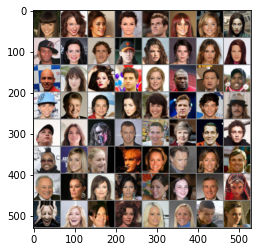

[0/10][0/3166]	Loss_D: 1.3840	Loss_G: 3.1961	D(x): 0.5814	D(G(z)): 0.5564 / 0.0429
[0/10][50/3166]	Loss_D: 0.1647	Loss_G: 16.8214	D(x): 0.9138	D(G(z)): 0.0000 / 0.0000
[0/10][100/3166]	Loss_D: 0.2343	Loss_G: 11.0997	D(x): 0.8464	D(G(z)): 0.0001 / 0.0000
[0/10][150/3166]	Loss_D: 0.8444	Loss_G: 3.3980	D(x): 0.9599	D(G(z)): 0.5100 / 0.0405
[0/10][200/3166]	Loss_D: 1.0781	Loss_G: 4.8283	D(x): 0.8655	D(G(z)): 0.5816 / 0.0106
[0/10][250/3166]	Loss_D: 2.1442	Loss_G: 3.9403	D(x): 0.2192	D(G(z)): 0.0060 / 0.0405
[0/10][300/3166]	Loss_D: 1.2314	Loss_G: 2.5140	D(x): 0.4203	D(G(z)): 0.0181 / 0.0987
[0/10][350/3166]	Loss_D: 0.4344	Loss_G: 2.4359	D(x): 0.7266	D(G(z)): 0.0684 / 0.1113
[0/10][400/3166]	Loss_D: 0.7402	Loss_G: 2.0682	D(x): 0.5886	D(G(z)): 0.1114 / 0.1573
[0/10][450/3166]	Loss_D: 0.3831	Loss_G: 2.8049	D(x): 0.7918	D(G(z)): 0.1189 / 0.0760
[0/10][500/3166]	Loss_D: 0.5713	Loss_G: 3.7558	D(x): 0.8814	D(G(z)): 0.3350 / 0.0313
[0/10][550/3166]	Loss_D: 0.6581	Loss_G: 1.7813	D(x): 0.6634	D(G(z)

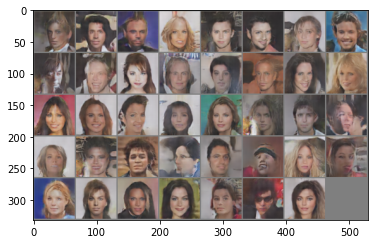

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import numpy as np
import os

# Display images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    img = img.cpu()  # Move the tensor to CPU
    npimg = img.numpy()  # Convert the tensor to a NumPy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1).squeeze(1)
    
# Set the path to the extracted Celeb-A dataset folder
celeba_path = './data/celeba/img_align_celeba'

# Define the data transformation
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the Celeb-A dataset
celeba_dataset = datasets.ImageFolder(os.path.dirname(celeba_path), transform=transform)
dataloader = torch.utils.data.DataLoader(celeba_dataset, batch_size=64, shuffle=True, num_workers=2)

# Display a batch of Celeb-A images before training
dataiter = iter(dataloader)
images, _ = dataiter.next()
imshow(utils.make_grid(images))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Number of epochs
num_epochs = 10

# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize the progression of the generator
fixed_noise = torch.randn(64, 100, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

netG = Generator().to(device)
netD = Discriminator().to(device)

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        # Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        # Train with all-real batch
        netD.zero_grad()
        real_data = data[0].to(device)
        batch_size = real_data.size(0)
        label = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_data)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # Train with all-fake batch
        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_data = netG(noise)
        label.fill_(fake_label)
        output = netD(fake_data.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update G network: maximize log(D(G(z)))
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake_data)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            
# Generate a batch of images after training
noise = torch.randn(batch_size, 100, 1, 1, device=device)
fake_images = netG(noise).detach()
imshow(utils.make_grid(fake_images))

# Save the trained Generator and Discriminator
torch.save(netG.state_dict(), 'generator_celeba.pth')
torch.save(netD.state_dict(), 'discriminator_celeba.pth')